<a href="https://colab.research.google.com/github/Tarane2028/ADS500B/blob/main/ADS504_Group_2_Final_Project_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Preparation**

In [ ]:
# import libraries and packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import RandomOverSampler

In [ ]:
 # Mount Google Drive to access data files stored there
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset from Google Drive and preview the first few rows
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/ADS504- Group 4- Final Project/universal_top_spotify_songs.csv')

# Display the first few rows of the DataFrame
print(df.head())


               spotify_id                  name              artists  \
0  6dOtVTDdiauQNBQEDOtlAB    BIRDS OF A FEATHER        Billie Eilish   
1  2qSkIjg1o9h3YT9RAgYN75              Espresso    Sabrina Carpenter   
2  5N3hjp1WNayUPZrA8kJmJP  Please Please Please    Sabrina Carpenter   
3  7tI8dRuH2Yc6RuoTjxo4dU                   Who                Jimin   
4  6XjDF6nds4DE2BBbagZol6             Gata Only  FloyyMenor, Cris Mj   

   daily_rank  daily_movement  weekly_movement country snapshot_date  \
0           1               0                0     NaN    2024-07-21   
1           2               0                0     NaN    2024-07-21   
2           3               1                0     NaN    2024-07-21   
3           4              -1               46     NaN    2024-07-21   
4           5               1                0     NaN    2024-07-21   

   popularity  is_explicit  ...  key loudness mode  speechiness  acousticness  \
0          99        False  ...    2  -10.171    1   

In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 

In [ ]:
#import data
#df = pd.read_csv('universal_top_spotify_songs.csv')

# Check for missing values in the dataset
missing_data = df.isnull().sum()

# Print the summary of missing data
print(missing_data)

spotify_id                0
name                     27
artists                  27
daily_rank                0
daily_movement            0
weekly_movement           0
country               13557
snapshot_date             0
popularity                0
is_explicit               0
duration_ms               0
album_name              506
album_release_date      372
danceability              0
energy                    0
key                       0
loudness                  0
mode                      0
speechiness               0
acousticness              0
instrumentalness          0
liveness                  0
valence                   0
tempo                     0
time_signature            0
dtype: int64


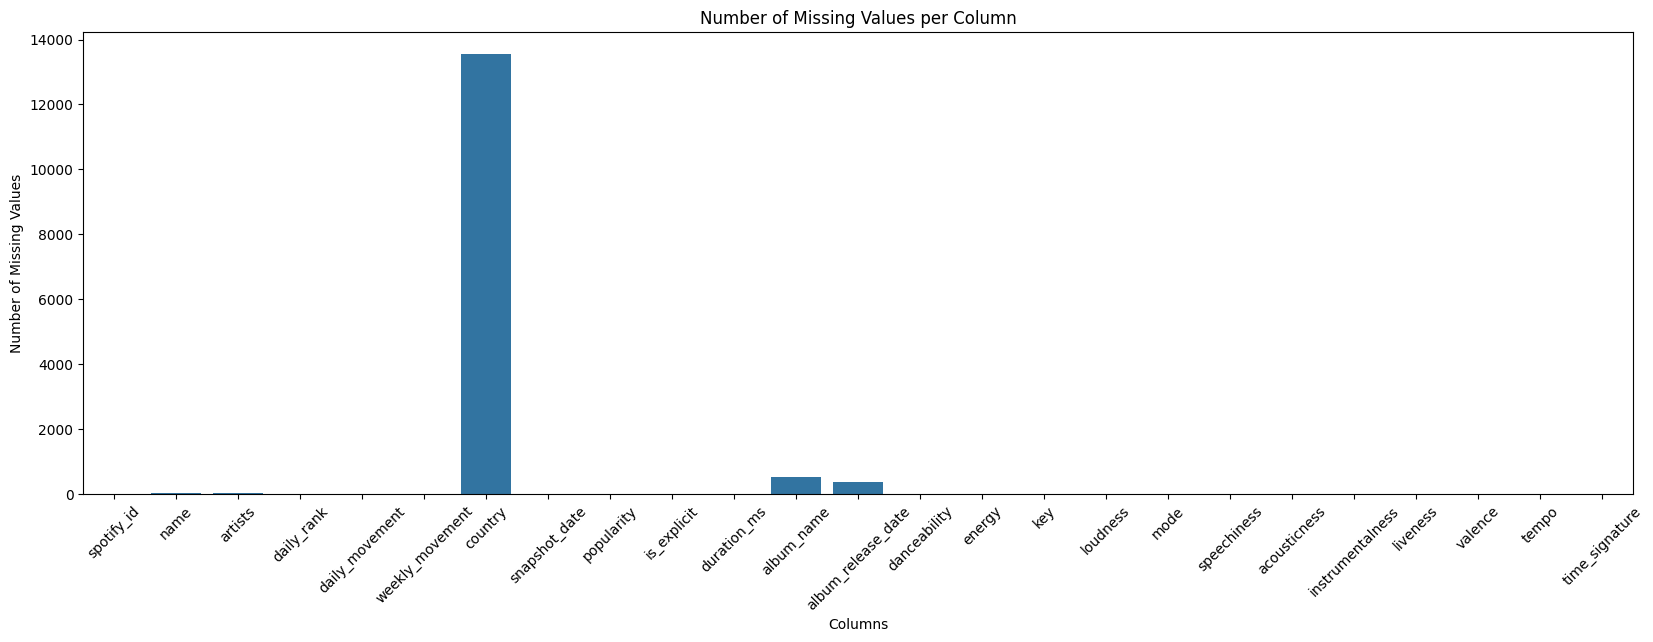

In [ ]:
# Visualize the missing data
plt.figure(figsize=(20, 6))
sns.barplot(x=missing_data.index, y=missing_data.values)
plt.title('Number of Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [ ]:
# Display the first few rows of the dataset
print(df.head())

               spotify_id                  name              artists  \
0  6dOtVTDdiauQNBQEDOtlAB    BIRDS OF A FEATHER        Billie Eilish   
1  2qSkIjg1o9h3YT9RAgYN75              Espresso    Sabrina Carpenter   
2  5N3hjp1WNayUPZrA8kJmJP  Please Please Please    Sabrina Carpenter   
3  7tI8dRuH2Yc6RuoTjxo4dU                   Who                Jimin   
4  6XjDF6nds4DE2BBbagZol6             Gata Only  FloyyMenor, Cris Mj   

   daily_rank  daily_movement  weekly_movement country snapshot_date  \
0           1               0                0     NaN    2024-07-21   
1           2               0                0     NaN    2024-07-21   
2           3               1                0     NaN    2024-07-21   
3           4              -1               46     NaN    2024-07-21   
4           5               1                0     NaN    2024-07-21   

   popularity  is_explicit  ...  key loudness mode  speechiness  acousticness  \
0          99        False  ...    2  -10.171    1   

# **Exploratory Data Analysis**

In [ ]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000603 entries, 0 to 1000602
Data columns (total 25 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   spotify_id          1000603 non-null  object 
 1   name                1000576 non-null  object 
 2   artists             1000576 non-null  object 
 3   daily_rank          1000603 non-null  int64  
 4   daily_movement      1000603 non-null  int64  
 5   weekly_movement     1000603 non-null  int64  
 6   country             987046 non-null   object 
 7   snapshot_date       1000603 non-null  object 
 8   popularity          1000603 non-null  int64  
 9   is_explicit         1000603 non-null  bool   
 10  duration_ms         1000603 non-null  int64  
 11  album_name          1000097 non-null  object 
 12  album_release_date  1000231 non-null  object 
 13  danceability        1000603 non-null  float64
 14  energy              1000603 non-null  float64
 15  key            

In [ ]:
# Display summary statistics of the dataset
print(df.describe())

         daily_rank  daily_movement  weekly_movement    popularity  \
count  1.000603e+06    1.000603e+06     1.000603e+06  1.000603e+06   
mean   2.548856e+01    8.143170e-01     2.678737e+00  7.681568e+01   
std    1.442815e+01    6.795724e+00     1.207855e+01  1.608150e+01   
min    1.000000e+00   -4.900000e+01    -4.900000e+01  0.000000e+00   
25%    1.300000e+01   -1.000000e+00    -3.000000e+00  6.600000e+01   
50%    2.500000e+01    0.000000e+00     0.000000e+00  8.100000e+01   
75%    3.800000e+01    2.000000e+00     5.000000e+00  8.900000e+01   
max    5.000000e+01    4.900000e+01     4.900000e+01  1.000000e+02   

        duration_ms  danceability        energy           key      loudness  \
count  1.000603e+06  1.000603e+06  1.000603e+06  1.000603e+06  1.000603e+06   
mean   1.930415e+05  6.849003e-01  6.504900e-01  5.498077e+00 -6.471164e+00   
std    5.068757e+04  1.378827e-01  1.634371e-01  3.560882e+00  2.616827e+00   
min    0.000000e+00  0.000000e+00  2.010000e-05  0.00

### Histograms for all numerical features in the dataset

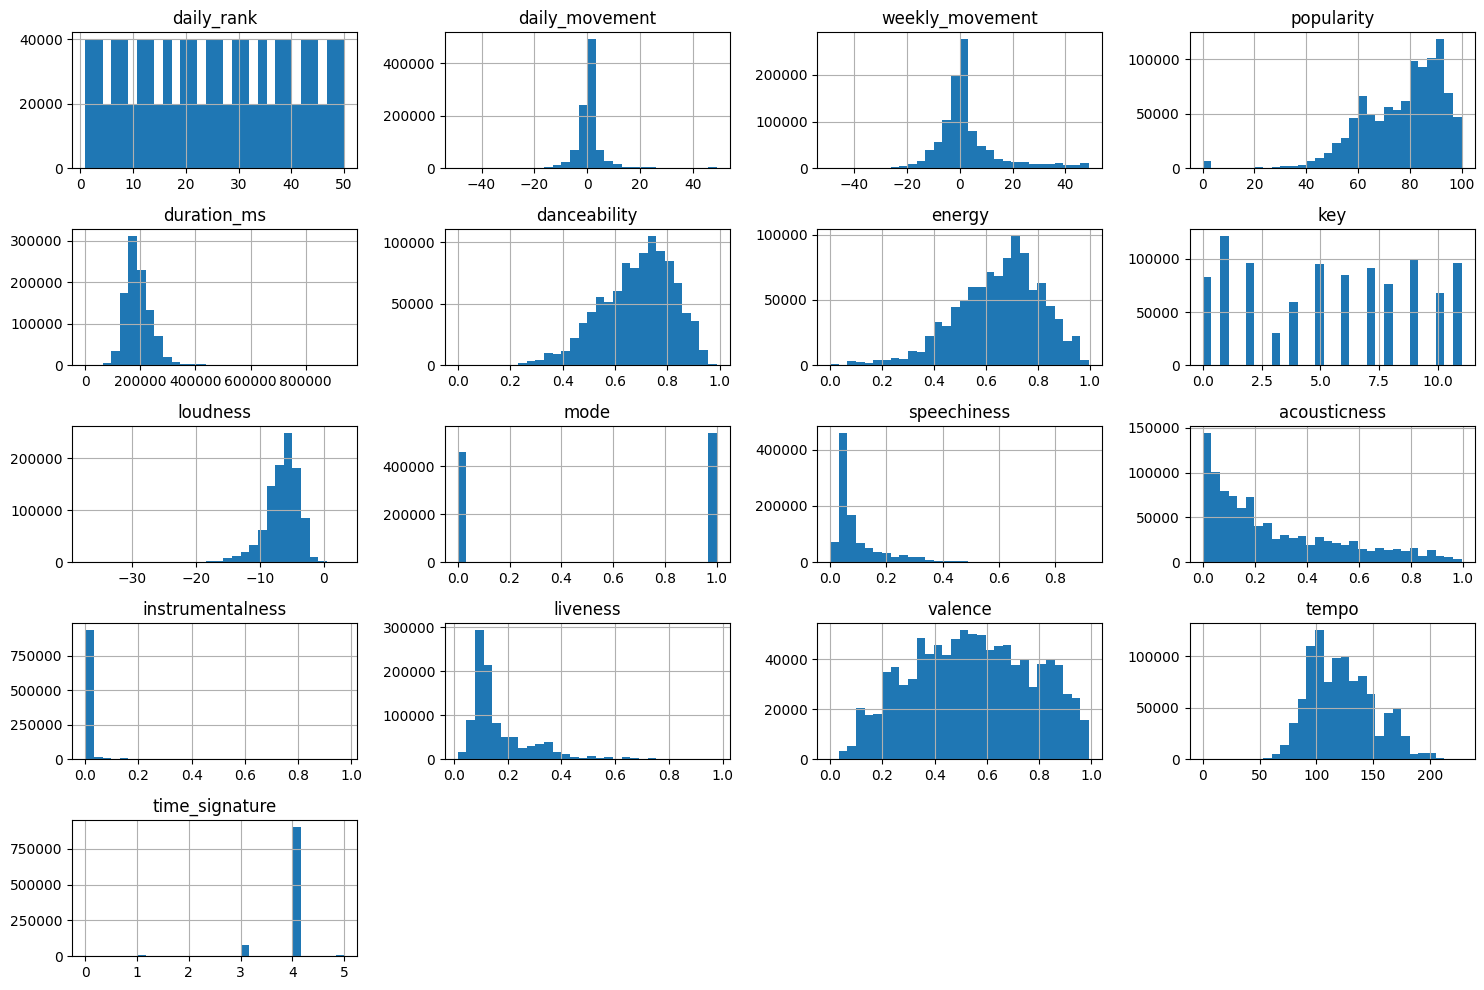

In [ ]:
# Visualize the distribution of numerical features
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

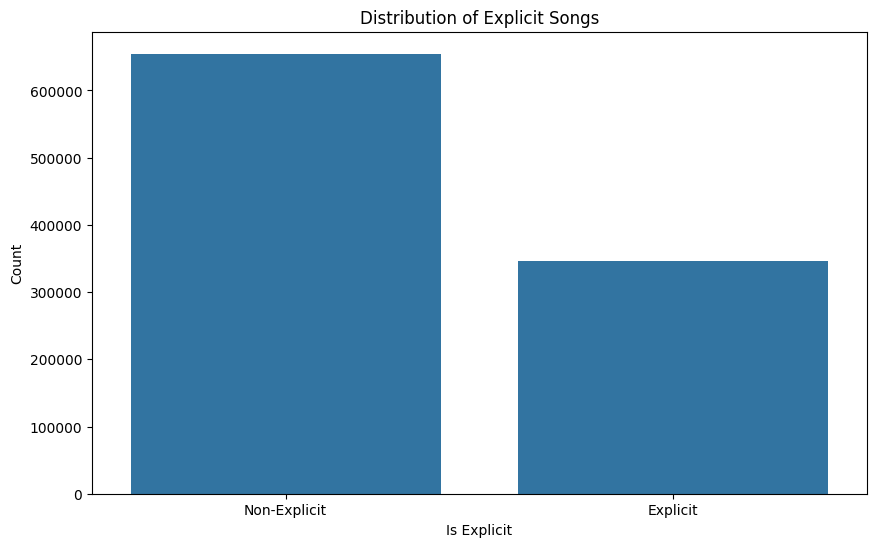

In [ ]:
# Plot the distribution of is_explicit (target variable)
plt.figure(figsize=(10, 6))
sns.countplot(x='is_explicit', data=df)
plt.title('Distribution of Explicit Songs')
plt.xlabel('Is Explicit')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Explicit', 'Explicit'])
plt.show()

In [ ]:
# Handle missing values with the mode (since data is skewed)
# for column in df.select_dtypes(include=['number']).columns:
#     df[column].fillna(df[column].mode()[0], inplace=True)

# Verify missing values have been handled
# print(df.isnull().sum())

# The only columns that have missing values are categorical for which we CAN use the mode.
# However, does it really make sense to do this given the nature of the data? I don't think so.
# Our best option is to drop them.

### Correlation matrix for numerical columns to understand Multicollinearity.

In [ ]:
# Select columns that are not of type 'object'
num_cols = df.select_dtypes(include=['int64', 'float64'])

# generate correlation matrix
corr_matrix = num_cols.corr()
formatted_corr_matrix = corr_matrix.style.format("{:.2f}")

# Unstack the correlation matrix and sort the values
corr_unstacked = corr_matrix.unstack()
sorted_corr = corr_unstacked.sort_values(ascending=False).reset_index()
sorted_corr.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Remove duplicate correlations (self-correlations and repeated pairs)
sorted_corr = sorted_corr[sorted_corr['Feature 1'] != sorted_corr['Feature 2']].drop_duplicates(subset=['Correlation'])

# Display the sorted correlation values in a well-formatted manner
print("Sorted Correlation Values:")
sorted_corr_styled = sorted_corr.style.background_gradient(cmap='coolwarm').format({'Correlation': "{:.2f}"})
display(sorted_corr_styled)

Sorted Correlation Values:


,Feature 1,Feature 2,Correlation
17,loudness,energy,0.73
19,valence,danceability,0.39
21,valence,energy,0.34
23,daily_movement,weekly_movement,0.31
25,valence,loudness,0.29
27,energy,danceability,0.24
29,danceability,loudness,0.23
31,speechiness,danceability,0.20
33,popularity,loudness,0.14
35,time_signature,speechiness,0.14


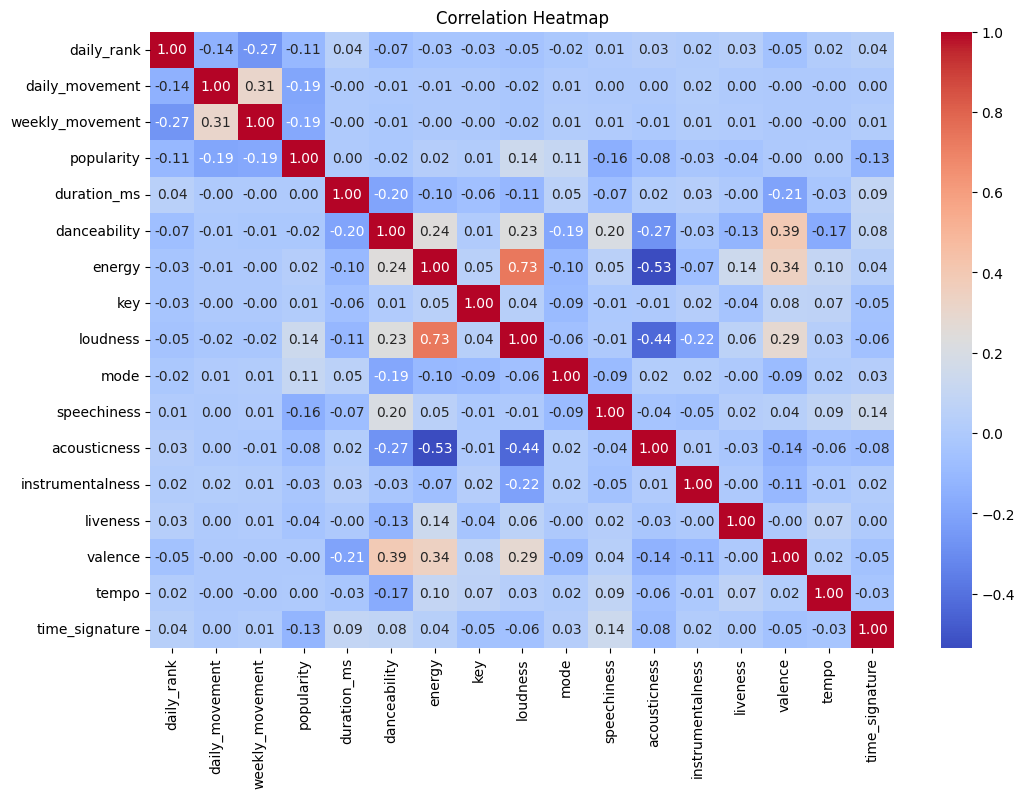

In [ ]:
# Visualize correlations using a heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = num_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# **Data Pre-Processing**

### Remove rows in the dataset with null values.


In [ ]:
# Drop rows with null values
df.dropna(axis=0, inplace=True)

# Verify that rows with null values have been dropped
print(df.isnull().sum())
print("Remaining rows:", len(df))

spotify_id            0
name                  0
artists               0
daily_rank            0
daily_movement        0
weekly_movement       0
country               0
snapshot_date         0
popularity            0
is_explicit           0
duration_ms           0
album_name            0
album_release_date    0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
dtype: int64
Remaining rows: 986543


### Columns with categorical features for one-hot encoding.

In [ ]:
 # identify categorical variables for one-hot encoding
categorical_columns = ['key', 'mode', 'country']

# apply one hot encoding to dataframe
df_encoded = pd.get_dummies(df, columns=categorical_columns)

### Numerical columns need to be scaled

In [ ]:
# identify target numerical columns for scaling
numerical_columns = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

# apply sclaing
scaler = StandardScaler()
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# Display the transformed dataset
print(df_encoded.head())

                spotify_id                                               name  \
50  0NLRYW9HyqHcbyzfAwskKN  Yebo Lapho (Gogo) (feat. DJ Maphorisa & Djy Biza)   
51  6AI3ezQ4o3HUoP6Dhudph3                                        Not Like Us   
52  4GxZKOak4mz6VmMJUmO4Is  Manzi Nte (feat. Masterpiece YVK, Ceeka RSA, M...   
53  1gM44tVZ9pfUe9v35Stp31      Kwelanga 2.0 (feat. Tman Xpress & LeeMcKrazy)   
54  3bqCtq5RcPzULlyqkFGVJ7                                       Ngathi Nguye   

                                              artists  daily_rank  \
50  Felo Le Tee, Scotts Maphuma, Thabza Tee, DJ Ma...           1   
51                                     Kendrick Lamar           2   
52  Tyler ICU, DJ Maphorisa, Masterpiece YVK, Ceek...           3   
53  Bassie, M-Touch, Ranger, Amaza, LeeMcKrazy, Tm...           4   
54                            Umafikizolo, Umashotana           5   

    daily_movement  weekly_movement snapshot_date  popularity  is_explicit  \
50               0  

### To remove any remaining rows with null values from the encoded DataFrame.


In [ ]:
# Drop rows with null values
df_encoded.dropna(axis=0, inplace=True)

# Verify that rows with null values have been dropped
print(df_encoded.isnull().sum())
print("Remaining rows:", len(df_encoded))

spotify_id        0
name              0
artists           0
daily_rank        0
daily_movement    0
                 ..
country_US        0
country_UY        0
country_VE        0
country_VN        0
country_ZA        0
Length: 108, dtype: int64
Remaining rows: 986543


### Select features and target variable for modeling.

In [ ]:
# List of independent variables
independent_vars = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                    'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'] + \
                   [col for col in df_encoded.columns if col.startswith('key_')] + \
                   [col for col in df_encoded.columns if col.startswith('mode_')] + \
                   [col for col in df_encoded.columns if col.startswith('country_')]

# Separate the dependent variable and independent variables
X = df_encoded[independent_vars]
y = df_encoded['is_explicit']

### Apply oversampling to balance classes.


In [ ]:
# Apply oversampling to the minority class
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Combine X_resampled and y_resampled into a single DataFrame
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

# Check the distribution of the target variable
print("Distribution after oversampling:")
print(df_resampled['is_explicit'].value_counts())

Distribution after oversampling:
is_explicit
False    646121
True     646121
Name: count, dtype: int64


### Split data into training and testing sets.

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# **Modeling**

## **Logistic Regression**

In [ ]:
# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy Score: 0.7338040049216736
Classification Report:
              precision    recall  f1-score   support

       False       0.74      0.72      0.73    193495
        True       0.73      0.75      0.74    194178

    accuracy                           0.73    387673
   macro avg       0.73      0.73      0.73    387673
weighted avg       0.73      0.73      0.73    387673



In [ ]:
# Create a DataFrame with the test data and add predictions
df_results = X_test.copy()
df_results['Actual'] = y_test
df_results['Predicted'] = y_pred

# Display the DataFrame with predictions
print(df_results.head())

        danceability    energy  loudness  speechiness  acousticness  \
349646      1.638222  0.779183  1.614929     1.818113     -0.735675   
470480      1.180872 -0.022902 -0.609673     1.246747     -0.958381   
582620      1.304284 -0.475988  0.370239    -0.315722     -0.745254   
438713      0.643668  0.301606 -0.331120     1.862065     -0.439132   
458887      0.796118 -0.292305 -0.089681    -0.209140      0.474842   

        instrumentalness  liveness   valence     tempo  duration_ms  ...  \
349646         -0.185791  0.057943 -0.878499 -0.936180    -0.595581  ...   
470480         -0.185522 -0.467786  1.208331 -1.292329    -1.161375  ...   
582620         -0.186020  1.061608  0.075231 -0.973703    -0.729667  ...   
438713         -0.185677 -0.021713  0.342100 -1.435080    -0.894621  ...   
458887         -0.186020 -0.427958  0.906463  0.058713     0.773273  ...   

        country_TR  country_TW  country_UA  country_US  country_UY  \
349646       False       False       False    

# GBM

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier model
gbm_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
gbm_model.fit(X_train, y_train)

# Save the model to a file (optional, for later use)
import joblib
joblib.dump(gbm_model, 'gbm_model.pkl')

['gbm_model.pkl']

In [ ]:
# Make predictions on the test data
y_pred_gbm = gbm_model.predict(X_test)

# Evaluate the model
print("Gradient Boosting Accuracy Score:", accuracy_score(y_test, y_pred_gbm))
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gbm))

# Create a DataFrame with the test data and add predictions
df_results_gbm = X_test.copy()
df_results_gbm['Actual'] = y_test
df_results_gbm['Predicted'] = y_pred_gbm

# Display the DataFrame with predictions
print(df_results_gbm.head())


Gradient Boosting Accuracy Score: 0.8359085426218817
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

       False       0.84      0.92      0.88    193825
        True       0.82      0.67      0.74    102138

    accuracy                           0.84    295963
   macro avg       0.83      0.80      0.81    295963
weighted avg       0.83      0.84      0.83    295963

        danceability    energy  loudness  speechiness  acousticness  \
60549       0.803377  0.258746 -0.603934     1.785150     -1.022240   
183040     -0.902609 -0.286182  0.788069    -0.690407     -0.295451   
754290     -0.561411  0.093431 -1.828727    -0.686012     -0.187689   
901761     -0.525114  0.485290  1.080397     0.279818     -1.054768   
426255      1.035682  1.054709  1.042899    -0.590418     -0.538911   

        instrumentalness  liveness   valence     tempo  duration_ms  ...  \
60549          -0.171700  0.169462  0.167104 -1.223951    -0.917983  ...   


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomizedSearchCV
random_search_gbm = RandomizedSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings to sample
    cv=3,       # Number of folds in cross-validation
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    random_state=42
)

# Perform hyperparameter tuning
random_search_gbm.fit(X_train, y_train)

# Display the best parameters and best score
print("Best Parameters:", random_search_gbm.best_params_)
print("Best Score:", random_search_gbm.best_score_)

# Save the best model (optional, for later use)
best_gbm_model = random_search_gbm.best_estimator_
joblib.dump(best_gbm_model, 'best_gbm_model.pkl')

# Here, we can also use a similar approach with GridSearch. However, this technique is alot more computationally expensive and will take longer!

# XG Boost

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Initialize the XGBoost Classifier model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Save the model to a file (optional, for later use)
joblib.dump(xgb_model, 'xgb_model.pkl')

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Accuracy Score:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Create a DataFrame with the test data and add predictions
df_results_xgb = X_test.copy()
df_results_xgb['Actual'] = y_test
df_results_xgb['Predicted'] = y_pred_xgb

# Display the DataFrame with predictions
print(df_results_xgb.head())


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:51:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy Score: 0.9814947133279852
XGBoost Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.98      0.98    193495
        True       0.98      0.98      0.98    194178

    accuracy                           0.98    387673
   macro avg       0.98      0.98      0.98    387673
weighted avg       0.98      0.98      0.98    387673

        danceability    energy  loudness  speechiness  acousticness  \
349646      1.638222  0.779183  1.614929     1.818113     -0.735675   
470480      1.180872 -0.022902 -0.609673     1.246747     -0.958381   
582620      1.304284 -0.475988  0.370239    -0.315722     -0.745254   
438713      0.643668  0.301606 -0.331120     1.862065     -0.439132   
458887      0.796118 -0.292305 -0.089681    -0.209140      0.474842   

        instrumentalness  liveness   valence     tempo  duration_ms  ...  \
349646         -0.185791  0.057943 -0.878499 -0.936180    -0.595581  ...   
470480         -0.18

# SVM

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# List of independent variables
independent_vars = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                    'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'] + \
                   [col for col in df_encoded.columns if col.startswith('key_')] + \
                   [col for col in df_encoded.columns if col.startswith('mode_')] + \
                   [col for col in df_encoded.columns if col.startswith('country_')] + \
                   [col for col in df_encoded.columns if col.startswith('genre_')]

# Separate the dependent variable and independent variables
X = df_encoded[independent_vars]
y = df_encoded['is_explicit']


## Split training and test model

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Initialize the SVM model
svm_model = SVC(kernel='linear', max_iter=1000)

# Fit the SVM model to the training data
svm_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(kernel='linear', max_iter=1000)

In [ ]:
# Make predictions on the test data using SVM
y_pred_svm = svm_model.predict(X_test)


## Evaluate Model

In [ ]:
# Evaluate the SVM model
print("SVM Accuracy Score:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Accuracy Score: 0.48412470477728636
SVM Classification Report:
              precision    recall  f1-score   support

       False       0.80      0.29      0.42    193825
        True       0.39      0.86      0.54    102138

    accuracy                           0.48    295963
   macro avg       0.59      0.57      0.48    295963
weighted avg       0.66      0.48      0.46    295963



# Random Forest

In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest model to the training data
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test data using Random Forest
y_pred_rf = rf_model.predict(X_test)


## Evaluate Model

In [ ]:
# Evaluate the Random Forest model
print("Random Forest Accuracy Score:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy Score: 0.9986890253173538
Random Forest Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00    193825
        True       1.00      1.00      1.00    102138

    accuracy                           1.00    295963
   macro avg       1.00      1.00      1.00    295963
weighted avg       1.00      1.00      1.00    295963



## Hypertuning SVM

In [ ]:
 !pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.6 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define the objective function
def objective(trial):
    C = trial.suggest_float('C', 1e-5, 1e5, log=True)
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf'])
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])

    model = SVC(C=C, kernel=kernel, gamma=gamma)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Create the Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Print best parameters and best score
print("Best Parameters:", study.best_params)
print("Best Score:", study.best_value)



[I 2024-08-01 06:55:54,933] A new study created in memory with name: no-name-779c27cd-a15c-415c-91a0-9c93fbbd8abd


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define a smaller parameter grid
param_grid = {
    'C': [1],          # Single value for C
    'kernel': ['linear'],  # Single kernel type
    'gamma': ['scale']   # Single value for gamma
}

# Initialize SVM model
svm_model = SVC()

# Initialize GridSearchCV with reduced cv and param_grid
grid_search = GridSearchCV(
    estimator=svm_model,
    param_grid=param_grid,
    cv=3,                # Number of cross-validation folds
    n_jobs=-1,           # Use all available cores
    verbose=2            # Verbosity level
)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the best model
best_svm_model = grid_search.best_estimator_
y_pred_best_svm = best_svm_model.predict(X_test)
print("Best SVM Accuracy Score:", accuracy_score(y_test, y_pred_best_svm))
print("Best SVM Classification Report:")
print(classification_report(y_test, y_pred_best_svm))


Fitting 3 folds for each of 1 candidates, totalling 3 fits


KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution
param_dist = {
    'n_estimators': [100],             # Single value for number of trees
    'max_depth': [None],               # Single value for maximum depth
    'min_samples_split': [2],          # Single value for minimum number of samples required to split
    'min_samples_leaf': [1]            # Single value for minimum number of samples required to be at a leaf node
}

# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=1,    # Number of parameter settings to sample
    cv=3,        # Number of cross-validation folds
    n_jobs=-1,   # Use all available cores
    verbose=1,   # Verbosity level
    random_state=42
)

# Fit RandomizedSearchCV to the data
random_search.fit(X_train, y_train)


Fitting 3 folds for each of 1 candidates, totalling 3 fits


KeyboardInterrupt: 